In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc


In [4]:
df = pd.read_csv("/kaggle/input/heart-disease-dataset-uci/HeartDiseaseTrain-Test.csv")


In [5]:
df.head()
#df.columns

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [6]:
df.isnull().sum()


age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

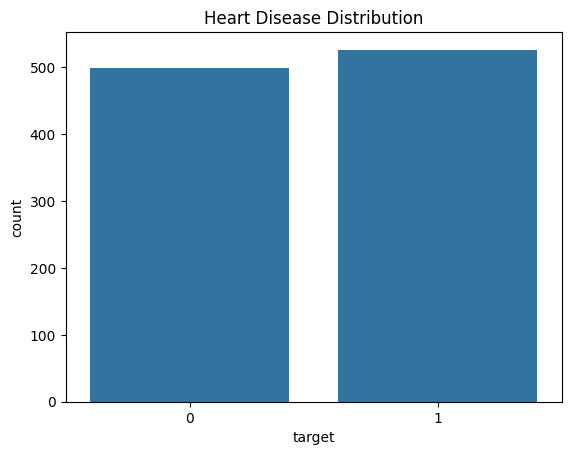

In [7]:
sns.countplot(x="target", data=df)
plt.title("Heart Disease Distribution")
plt.show()


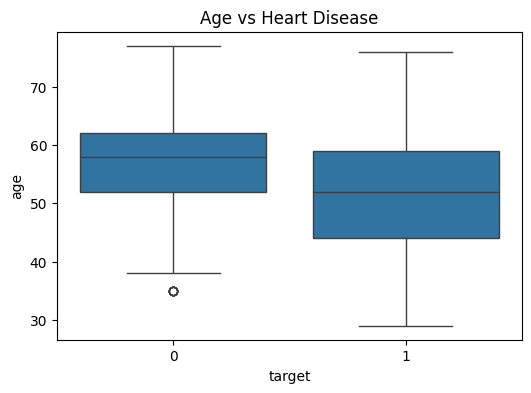

In [8]:
plt.figure(figsize=(6,4))
sns.boxplot(x="target", y="age", data=df)
plt.title("Age vs Heart Disease")
plt.show()


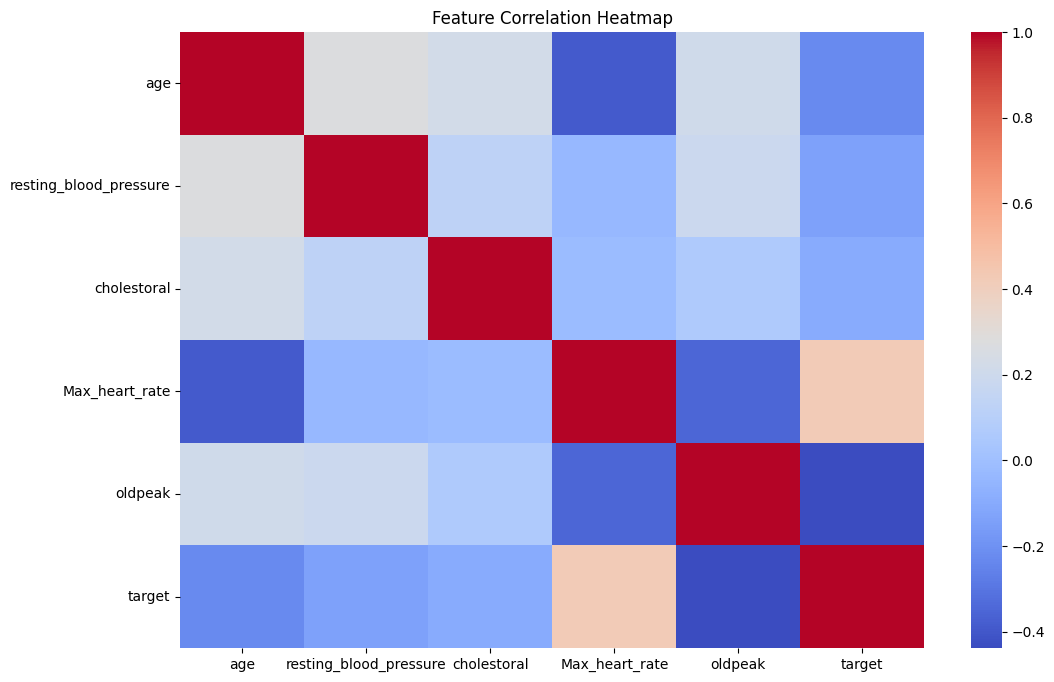

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include='number').corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()



In [11]:
X = df.drop("target", axis=1)
y = df["target"]

In [12]:
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).drop('target', axis=1).columns


In [13]:
print(f"categorical columns: {categorical_cols}")

categorical columns: Index(['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg',
       'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy',
       'thalassemia'],
      dtype='object')


In [14]:
print(f"numerical columns: {numerical_cols}")

numerical columns: Index(['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate',
       'oldpeak'],
      dtype='object')


In [15]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(drop="first"), categorical_cols)
    ]
)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [17]:
#Logistic Regression model 

logistic_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", LogisticRegression(max_iter=1000))
])


In [18]:
#Decision Tree model

dt_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", DecisionTreeClassifier(random_state=42))
])


In [20]:
logistic_pipeline.fit(X_train, y_train)



Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate',
       'oldpeak'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg',
       'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy',
       'thalassemia'],
      dtype='object'))])),
                ('model', LogisticRegression(max_iter=1000))])

In [21]:
dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate',
       'oldpeak'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg',
       'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy',
       'thalassemia'],
      dtype='object'))])),
                ('model', DecisionTreeClassifier(random_state=42))])

In [22]:
y_pred_log = logistic_pipeline.predict(X_test)
y_pred_dt = dt_pipeline.predict(X_test)


In [23]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Logistic Regression Accuracy: 0.8146341463414634
Decision Tree Accuracy: 0.9853658536585366


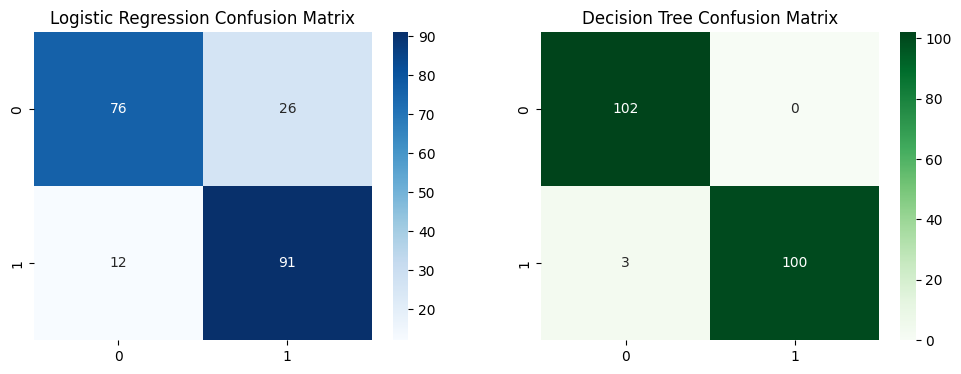

In [24]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Greens")
plt.title("Decision Tree Confusion Matrix")

plt.show()


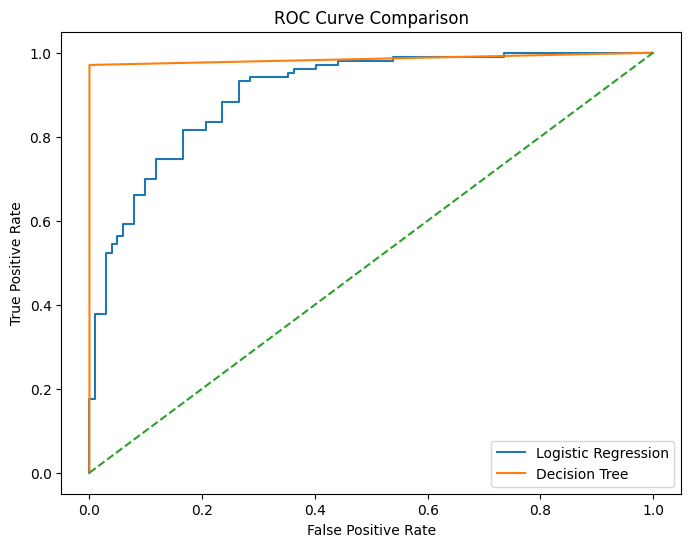

In [25]:
y_prob_log = logistic_pipeline.predict_proba(X_test)[:,1]
y_prob_dt = dt_pipeline.predict_proba(X_test)[:,1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)

plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label="Logistic Regression")
plt.plot(fpr_dt, tpr_dt, label="Decision Tree")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


In [27]:
num_features = numerical_cols.tolist()

cat_features = (
    dt_pipeline.named_steps["preprocessing"]
    .named_transformers_["cat"]
    .get_feature_names_out(categorical_cols)
)

all_features = num_features + list(cat_features)

importances = dt_pipeline.named_steps["model"].feature_importances_

feat_imp = pd.Series(importances, index=all_features).sort_values(ascending=False)

feat_imp.head(10)


chest_pain_type_Typical angina        0.274524
thalassemia_Reversable Defect         0.131987
vessels_colored_by_flourosopy_Zero    0.110530
oldpeak                               0.089716
Max_heart_rate                        0.073267
slope_Flat                            0.050531
age                                   0.050490
cholestoral                           0.047636
resting_blood_pressure                0.038742
sex_Male                              0.026434
dtype: float64

In [28]:
coefficients = logistic_pipeline.named_steps["model"].coef_[0]

log_features = pd.Series(coefficients, index=feature_names).sort_values(
    key=abs, ascending=False
)

log_features.head(10)


chest_pain_type_Typical angina        -1.979360
vessels_colored_by_flourosopy_Two     -1.743689
sex_Male                              -1.557277
thalassemia_Reversable Defect         -1.308174
vessels_colored_by_flourosopy_Zero     1.202587
vessels_colored_by_flourosopy_Three   -1.062171
slope_Flat                            -1.060284
vessels_colored_by_flourosopy_One     -0.892836
chest_pain_type_Atypical angina       -0.682136
thalassemia_No                        -0.667652
dtype: float64